# Messen Sie den Abstand zu Zellen in einem anderen Markierungsbild
In einigen Projekten, in denen Zellen, Zellkerne und andere Organellen mit mehreren Markern abgebildet werden, interessieren wir uns für die Messung von Abständen zwischen Zellen mit unterschiedlichen Expressionsmustern. Bei einem Gewebe, in dem nicht alle Zellen einen bestimmten Marker exprimieren, möchten wir möglicherweise den Abstand jeder Zelle zur nächsten Zelle messen, die diesen Marker exprimiert. Daher wollen wir diesen Abstand in einer Karte messen und visualisieren.

In [1]:
import numpy as np
import pyclesperanto_prototype as cle
import pandas as pd

cle.get_device()

<gfx90c on Platform: AMD Accelerated Parallel Processing (2 refs)>

Unser Ausgangspunkt ist ein Markierungsbild und ein weiteres Markierungsbild, aus dem einige der Markierungen im ersten Bild ausgewählt werden. Das erste Markierungsbild stellt alle Zellen dar. Das zweite Markierungsbild repräsentiert Zellen, die den Marker exprimieren.

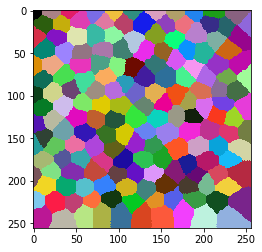

In [2]:
label_image = cle.artificial_tissue_2d()
cle.imshow(label_image, labels=True)

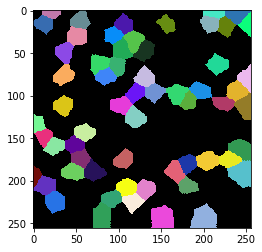

In [3]:
random_vector = np.random.random((1, int(label_image.max() + 1)))
sparse_labels = cle.exclude_labels_with_values_out_of_range(random_vector, label_image, minimum_value_range=0, maximum_value_range=0.3)
cle.imshow(sparse_labels, labels=True)

Wir zählen nun für jede Markierung in `label_image`, wie viele Markierungen im Bild `sparse_labels` in der Nähe sind. Zur Messung des Abstands verwenden wir den Schwerpunktabstand.

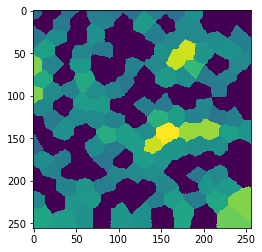

In [4]:
distance_map = cle.average_distance_to_n_nearest_other_labels_map(label_image, sparse_labels, n=1)
cle.imshow(distance_map)

Wir können diese Werte auch auslesen.

In [5]:
statistics = cle.statistics_of_labelled_pixels(distance_map, label_image)

table = pd.DataFrame(statistics)

# Die obige Tabelle enthält zu viele Informationen.
# Daher benennen wir eine Spalte um und entfernen die meisten anderen
table = table.rename(columns={"mean_intensity": "centroid_distance"})
table[['label', 'centroid_distance']]

label  centroid_distance
0        1          13.957838
1        2           0.000000
2        3          15.516336
3        4          17.409723
4        5          16.673353
..     ...                ...
170    171          20.870539
171    172           0.000000
172    173          24.419371
173    174           0.000000
174    175          32.159912

[175 rows x 2 columns]